Data Heart Disease :
1. age : age in years
2. sex : (1 = male, 0 = female)
3. cp : chest pain type (4 values)
4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)
5. chol : serum cholestoral in mg/dl
6. fbs : fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
7. restecg : resting electrocardiographic results (values 0,1,2)
8. thalach : maximum heart rate achieved
9. exang : exercise induced angina (1 = yes, 0 = no)
10. oldpeak : ST depression induced by exercise relative to rest
11. slope : the slope of the peak exercise ST segment
12. ca : number of major vessels (0-3) colored by flourosopy
13. thal : 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target = presence of heart disease in the patient ( 0 = no disease, 1 = disease)

**Import Dataset**

---



In [1]:
# General Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings(action="ignore")

# Preprocessing Libraries

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

# Machine Learning Libraries

import sklearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
!pip install catboost
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingCVClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hearts/heart.csv


In [3]:
data = pd.read_csv("/kaggle/input/hearts/heart.csv")

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.head() #beberapa baris di awal data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#**Data Quality Checking**

Check Missing Value

In [7]:
data.isnull().sum() #melihat jumlah missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Check Duplicates Data

In [8]:
data.duplicated() #melihat data yang duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [9]:
print(data.duplicated().sum()) #melihat jumlah data duplicate

723


In [10]:
data_noduplicate = data.drop_duplicates() #melakukan drop pada data duplicate
data_noduplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [11]:
print(data_noduplicate.duplicated().sum()) #melihat kembali jumlah data duplicate

0


Check Outliers

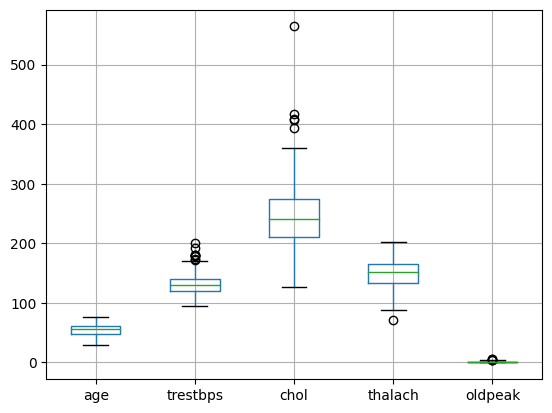

In [12]:
data_noduplicate[["age", "trestbps", "chol", "thalach", "oldpeak"]].boxplot() #mengecek outlier menggunakan boxplot
plt.show()

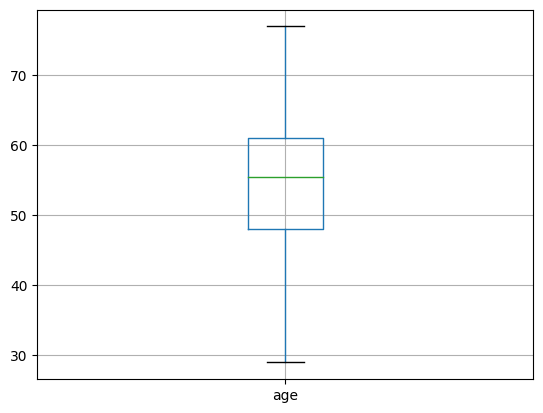

In [13]:
data_noduplicate[["age"]].boxplot()
plt.show()

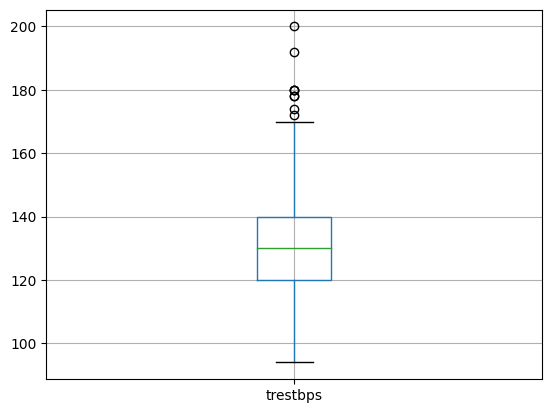

In [14]:
data_noduplicate[["trestbps"]].boxplot()
plt.show()

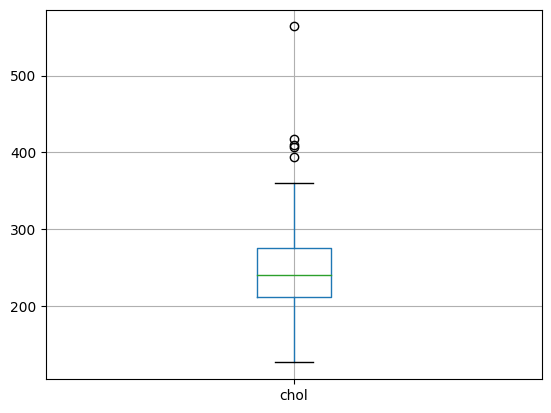

In [15]:
data_noduplicate[["chol"]].boxplot()
plt.show()

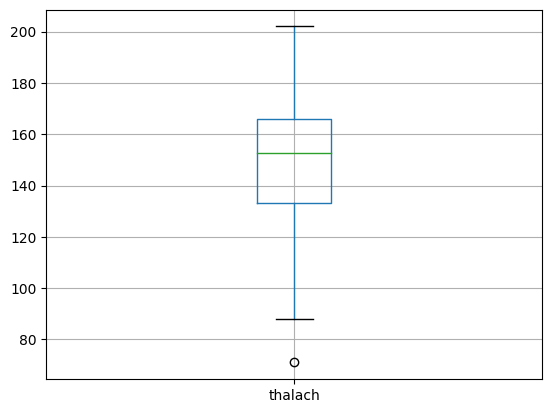

In [16]:
data_noduplicate[["thalach"]].boxplot()
plt.show()

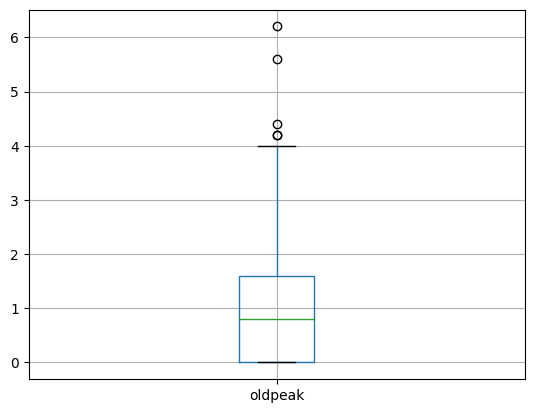

In [17]:
data_noduplicate[["oldpeak"]].boxplot()
plt.show()

Drop Outlier

In [18]:

for x in ['trestbps']:
    q75,q25 = np.percentile(data_noduplicate.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data_noduplicate.loc[data_noduplicate[x] < min,x] = np.nan
    data_noduplicate.loc[data_noduplicate[x] > max,x] = np.nan

for x in ['chol']:
    q75,q25 = np.percentile(data_noduplicate.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data_noduplicate.loc[data_noduplicate[x] < min,x] = np.nan
    data_noduplicate.loc[data_noduplicate[x] > max,x] = np.nan

for x in ['thalach']:
    q75,q25 = np.percentile(data_noduplicate.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data_noduplicate.loc[data_noduplicate[x] < min,x] = np.nan
    data_noduplicate.loc[data_noduplicate[x] > max,x] = np.nan

for x in ['oldpeak']:
    q75,q25 = np.percentile(data_noduplicate.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data_noduplicate.loc[data_noduplicate[x] < min,x] = np.nan
    data_noduplicate.loc[data_noduplicate[x] > max,x] = np.nan

In [19]:
data_noduplicate.isnull().sum() 

age         0
sex         0
cp          0
trestbps    9
chol        5
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
data_nooutlier = data_noduplicate.dropna(axis=0) 

In [21]:
data_nooutlier.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

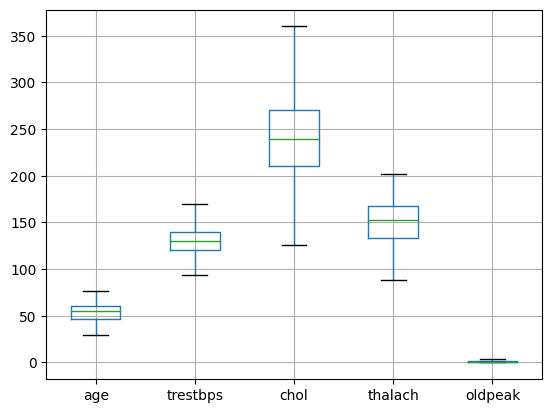

In [22]:
data_nooutlier[["age", "trestbps", "chol", "thalach", "oldpeak"]].boxplot() 
plt.show()

Data Imbalance

In [23]:
targett = data_nooutlier['target']
#group by target
targett = pd.DataFrame(targett.value_counts(sort=True))
targett

,target
1,158
0,125


In [24]:

fig = px.pie( 
    data_nooutlier, 
    names = 'target',
    title = 'Variabel target')
fig.show()

In [25]:
 
fig = px.histogram(
    data_nooutlier,
    x = 'target',
    color = 'target'
)
fig.show()

#**EDA**

Descriptive Statistics

In [26]:
data_nooutlier.describe(include="all") 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,0.699647,0.985866,129.883392,242.314488,0.141343,0.522968,149.961131,0.318021,0.951943,1.427562,0.696113,2.296820,0.558304
std,9.128186,0.459224,1.031324,15.387795,44.654188,0.348992,0.514336,22.691625,0.466533,1.026400,0.599246,0.985472,0.610392,0.497469
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


In [27]:
data.cov() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.306450,-0.431198,-0.672251,43.085733,102.890625,0.392164,-0.635490,-81.446089,0.378144,2.218825,-0.947742,2.539458,0.407093,-1.040392
sex,-0.431198,0.211944,-0.019491,-0.636863,-4.708984,0.004465,-0.013395,-0.522838,0.030288,0.045812,-0.007584,0.053021,0.056697,-0.064346
cp,-0.672251,-0.019491,1.060160,0.688565,-4.336914,0.029108,0.023687,7.268296,-0.195451,-0.211407,0.083727,-0.187017,-0.104385,0.223903
trestbps,43.085733,-0.636863,0.688565,306.835410,115.657227,1.135165,-1.144685,-15.822822,0.506798,3.857971,-1.303344,1.887842,0.644446,-1.215584
chol,102.890625,-4.708984,-4.336914,115.657227,2661.787109,0.495117,-4.014648,-25.841797,1.643555,3.933301,-0.454102,3.949219,3.209961,-2.579102
fbs,0.392164,0.004465,0.029108,1.135165,0.495117,0.127111,-0.019583,-0.072719,0.008303,0.004549,-0.013634,0.050406,-0.009333,-0.007339
restecg,-0.635490,-0.013395,0.023687,-1.144685,-4.014648,-0.019583,0.278655,0.587909,-0.016373,-0.031085,0.028073,-0.042482,-0.006718,0.035496
thalach,-81.446089,-0.522838,7.268296,-15.822822,-25.841797,-0.072719,0.587909,529.263325,-4.136114,-9.456022,5.618078,-4.929917,-1.400290,4.865194
exang,0.378144,0.030288,-0.195451,0.506798,1.643555,0.008303,-0.016373,-4.136114,0.223514,0.172684,-0.078077,0.052558,0.057865,-0.103558
oldpeak,2.218825,0.045812,-0.211407,3.857971,3.933301,0.004549,-0.031085,-9.456022,0.172684,1.380750,-0.417527,0.268673,0.147810,-0.257632


In [28]:
#cumulative and relative frequencies
targett = data_nooutlier['target']
#group by target
targett = pd.DataFrame(targett.value_counts(sort=True))
#create new column with cumulative sum
targett['cum_sum'] = targett['target'].cumsum()
#create new column with relative frequency
targett['cum_perc'] = 100*targett['cum_sum']/targett['target'].sum()
targett

,target,cum_sum,cum_perc
1,158,158,55.830389
0,125,283,100.000000


In [29]:
#cumulative and relative frequencies
sexx = data_nooutlier['sex']
#group by target
sexx = pd.DataFrame(sexx.value_counts(sort=True))
#create new column with cumulative sum
sexx['cum_sum'] = sexx['sex'].cumsum()
#create new column with relative frequency
sexx['cum_perc'] = 100*sexx['cum_sum']/sexx['sex'].sum()
sexx

,sex,cum_sum,cum_perc
1,198,198,69.964664
0,85,283,100.000000


In [30]:
#cumulative and relative frequencies
cpp = data_nooutlier['cp']
#group by target
cpp = pd.DataFrame(cpp.value_counts(sort=True))
#create new column with cumulative sum
cpp['cum_sum'] = cpp['cp'].cumsum()
#create new column with relative frequency
cpp['cum_perc'] = 100*cpp['cum_sum']/cpp['cp'].sum()
cpp

,cp,cum_sum,cum_perc
0,130,130,45.936396
2,82,212,74.911661
1,49,261,92.226148
3,22,283,100.000000


In [31]:
#cumulative and relative frequencies
fbss = data_nooutlier['fbs']
#group by target
fbss = pd.DataFrame(fbss.value_counts(sort=True))
#create new column with cumulative sum
fbss['cum_sum'] = fbss['fbs'].cumsum()
#create new column with relative frequency
fbss['cum_perc'] = 100*fbss['cum_sum']/fbss['fbs'].sum()
fbss

,fbs,cum_sum,cum_perc
0,243,243,85.865724
1,40,283,100.000000


In [32]:
#cumulative and relative frequencies
restecgg = data_nooutlier['restecg']
#group by target
restecgg = pd.DataFrame(restecgg.value_counts(sort=True))
#create new column with cumulative sum
restecgg['cum_sum'] = restecgg['restecg'].cumsum()
#create new column with relative frequency
restecgg['cum_perc'] = 100*restecgg['cum_sum']/restecgg['restecg'].sum()
restecgg

,restecg,cum_sum,cum_perc
1,144,144,50.883392
0,137,281,99.293286
2,2,283,100.000000


In [33]:
#cumulative and relative frequencies
exangg = data_nooutlier['exang']
#group by target
exangg = pd.DataFrame(exangg.value_counts(sort=True))
#create new column with cumulative sum
exangg['cum_sum'] = exangg['exang'].cumsum()
#create new column with relative frequency
exangg['cum_perc'] = 100*exangg['cum_sum']/exangg['exang'].sum()
exangg

,exang,cum_sum,cum_perc
0,193,193,68.19788
1,90,283,100.00000


In [34]:
#cumulative and relative frequencies
slopee = data_nooutlier['slope']
#group by target
slopee = pd.DataFrame(slopee.value_counts(sort=True))
#create new column with cumulative sum
slopee['cum_sum'] = slopee['slope'].cumsum()
#create new column with relative frequency
slopee['cum_perc'] = 100*slopee['cum_sum']/slopee['slope'].sum()
slopee

,slope,cum_sum,cum_perc
2,137,137,48.409894
1,130,267,94.346290
0,16,283,100.000000


In [35]:
#cumulative and relative frequencies
caa = data_nooutlier['ca']
#group by target
caa = pd.DataFrame(caa.value_counts(sort=True))
#create new column with cumulative sum
caa['cum_sum'] = caa['ca'].cumsum()
#create new column with relative frequency
caa['cum_perc'] = 100*caa['cum_sum']/caa['ca'].sum()
caa

,ca,cum_sum,cum_perc
0,165,165,58.303887
1,63,228,80.565371
2,35,263,92.932862
3,16,279,98.586572
4,4,283,100.000000


In [36]:
#cumulative and relative frequencies
thall = data_nooutlier['thal']
#group by target
thall = pd.DataFrame(thall.value_counts(sort=True))
#create new column with cumulative sum
thall['cum_sum'] = thall['thal'].cumsum()
#create new column with relative frequency
thall['cum_perc'] = 100*thall['cum_sum']/thall['thal'].sum()
thall

,thal,cum_sum,cum_perc
2,159,159,56.183746
3,105,264,93.286219
1,17,281,99.293286
0,2,283,100.000000


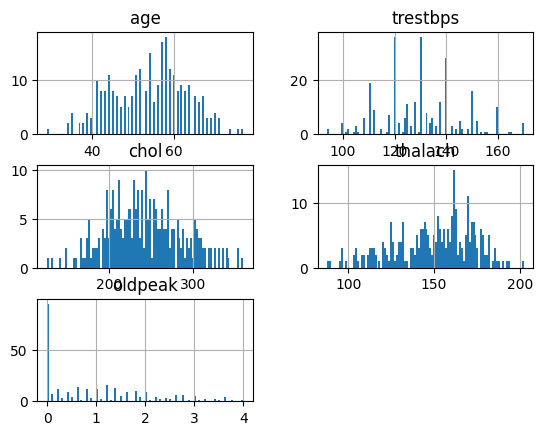

In [37]:
#distribusi variabel numerik
data_nooutlier[["age", "trestbps", "chol", "thalach", "oldpeak"]].hist(bins=100) 
plt.show()

Correlation Between Features

In [38]:
data_nooutlier.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.064118,-0.058687,0.282669,0.171015,0.106885,-0.110517,-0.411108,0.093718,0.209254,-0.149095,0.320589,0.055908,-0.222416
sex,-0.064118,1.000000,-0.091357,0.007572,-0.123863,0.066692,-0.083290,-0.042981,0.182596,0.157352,-0.060014,0.150209,0.243271,-0.318896
cp,-0.058687,-0.091357,1.000000,0.083242,-0.080369,0.084389,0.080836,0.285605,-0.388610,-0.122582,0.095881,-0.171717,-0.179204,0.416319
trestbps,0.282669,0.007572,0.083242,1.000000,0.115138,0.127221,-0.139228,-0.071600,0.001726,0.144438,-0.083024,0.105458,-0.011026,-0.115614
chol,0.171015,-0.123863,-0.080369,0.115138,1.000000,0.013066,-0.142285,-0.020128,0.076547,-0.009534,0.039352,0.081070,0.091667,-0.105627
fbs,0.106885,0.066692,0.084389,0.127221,0.013066,1.000000,-0.077417,-0.023484,0.006080,0.015070,-0.069563,0.156265,-0.064469,-0.027210
restecg,-0.110517,-0.083290,0.080836,-0.139228,-0.142285,-0.077417,1.000000,0.089556,-0.104440,-0.089255,0.111841,-0.091123,0.034684,0.171453
thalach,-0.411108,-0.042981,0.285605,-0.071600,-0.020128,-0.023484,0.089556,1.000000,-0.387726,-0.341190,0.376494,-0.253937,-0.112838,0.422559
exang,0.093718,0.182596,-0.388610,0.001726,0.076547,0.006080,-0.104440,-0.387726,1.000000,0.318620,-0.259780,0.133820,0.202806,-0.431599
oldpeak,0.209254,0.157352,-0.122582,0.144438,-0.009534,0.015070,-0.089255,-0.341190,0.318620,1.000000,-0.525142,0.179032,0.189822,-0.434108


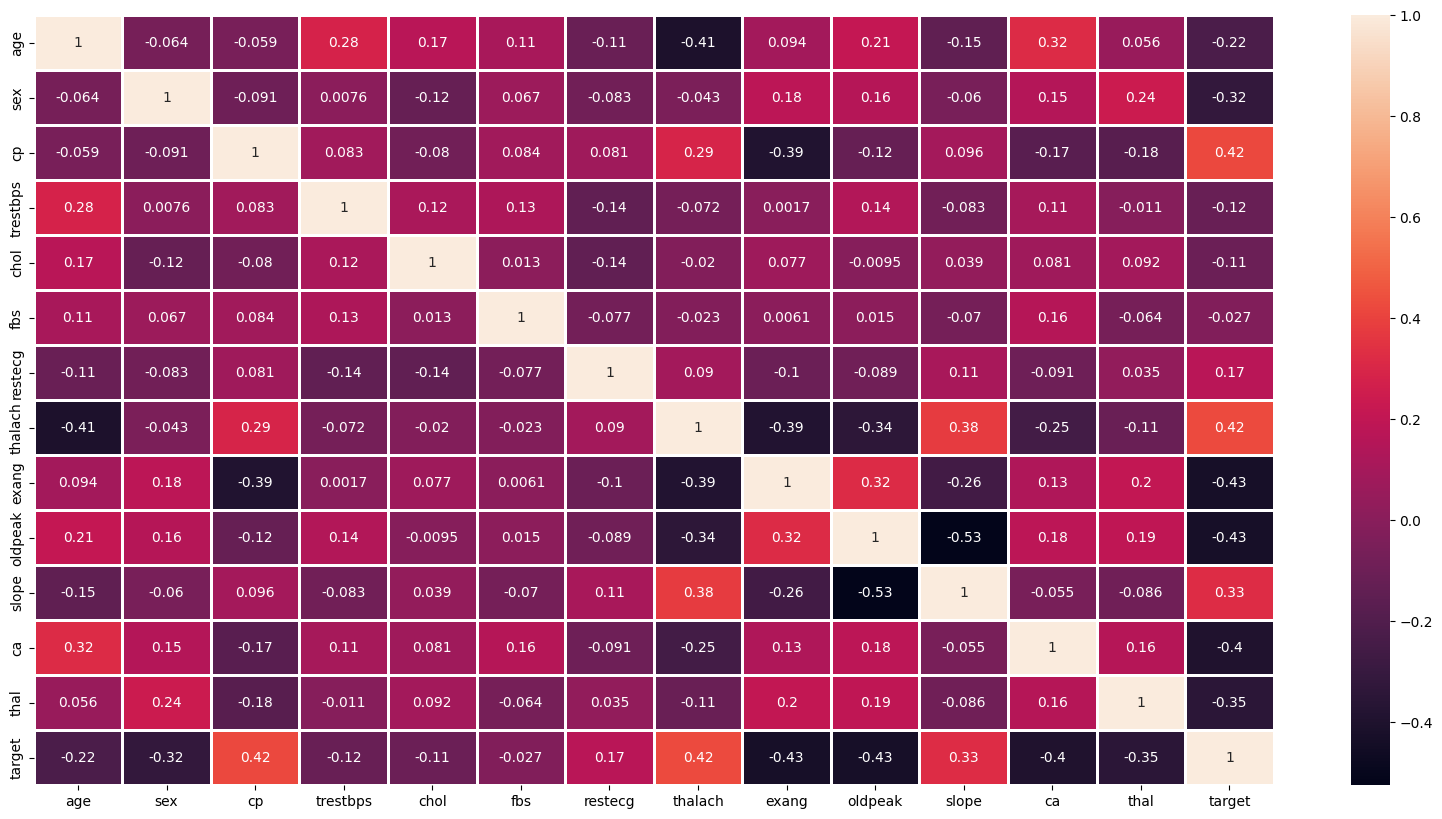

In [39]:
# heatmap
plt.figure(figsize=(20,10)) 
sns.heatmap(data_nooutlier.corr(), annot=True, linewidths=1, linecolor="white")
plt.show()

Histogram

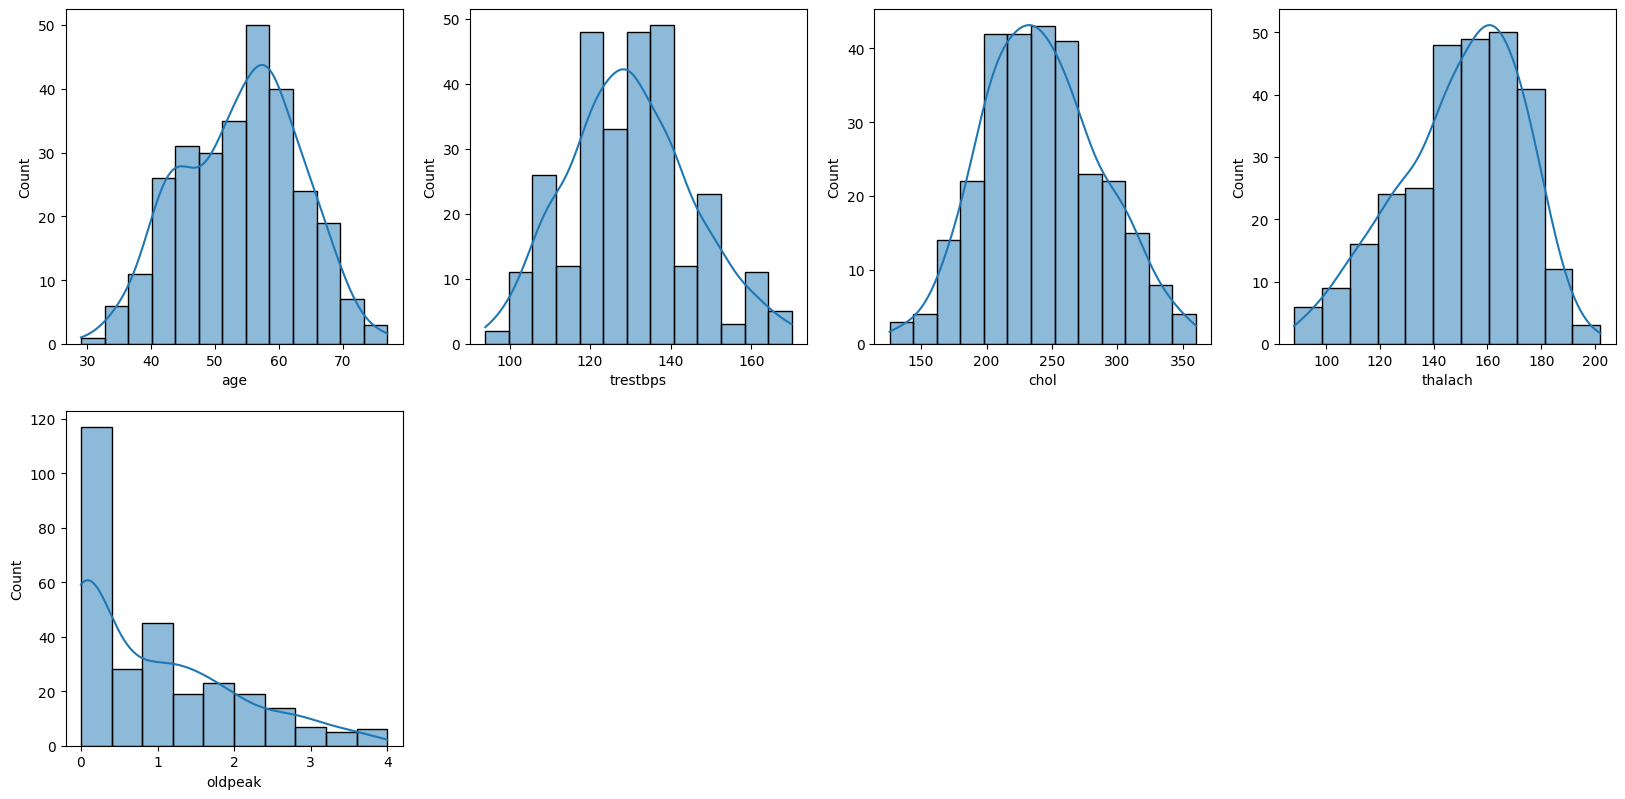

In [40]:
plt.figure(figsize = (20, 20))
columns = list(data_nooutlier[["age", "trestbps", "chol", "thalach", "oldpeak"]])
subplt = 1
for col in columns:
    if subplt <= len(columns):
        ax = plt.subplot(4, 4, subplt)
        sns.histplot(data_nooutlier[col], kde = True)
        plt.xlabel(col)
    subplt += 1
plt.show()

In [41]:
fig = px.histogram(
    data_nooutlier,
    x = 'sex',
    color = 'sex'
)
fig.show()

In [42]:
fig = px.histogram(
    data_nooutlier,
    x = 'cp',
    color = 'cp'
)
fig.show()

In [43]:
fig = px.histogram(
    data_nooutlier,
    x = 'fbs',
    color = 'fbs'
)
fig.show()

In [44]:
fig = px.histogram(
    data_nooutlier,
    x = 'restecg',
    color = 'restecg'
)
fig.show()

In [45]:
fig = px.histogram(
    data_nooutlier,
    x = 'exang',
    color = 'exang'
)
fig.show()

In [46]:
fig = px.histogram(
    data_nooutlier,
    x = 'slope',
    color = 'slope'
)
fig.show()

In [47]:
fig = px.histogram(
    data_nooutlier,
    x = 'ca',
    color = 'ca'
)
fig.show()

In [48]:
fig = px.histogram(
    data_nooutlier,
    x = 'thal',
    color = 'thal'
)
fig.show()

Boxplot

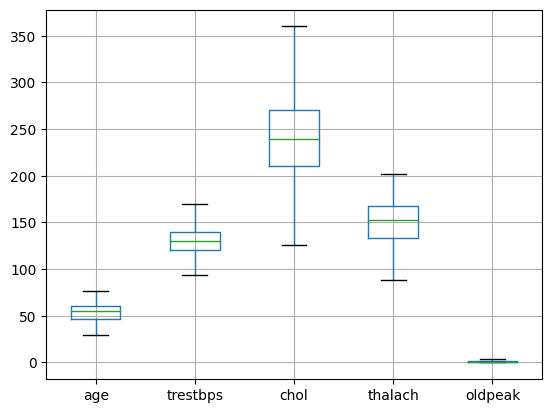

In [49]:
data_nooutlier[["age", "trestbps", "chol", "thalach", "oldpeak"]].boxplot()
plt.show()

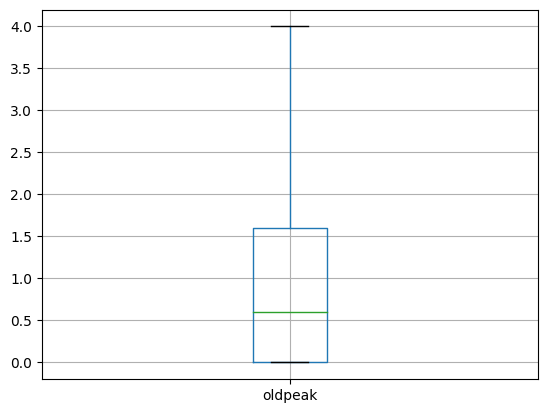

In [50]:
data_nooutlier[["oldpeak"]].boxplot()
plt.show()

Pairplot

Pairplot


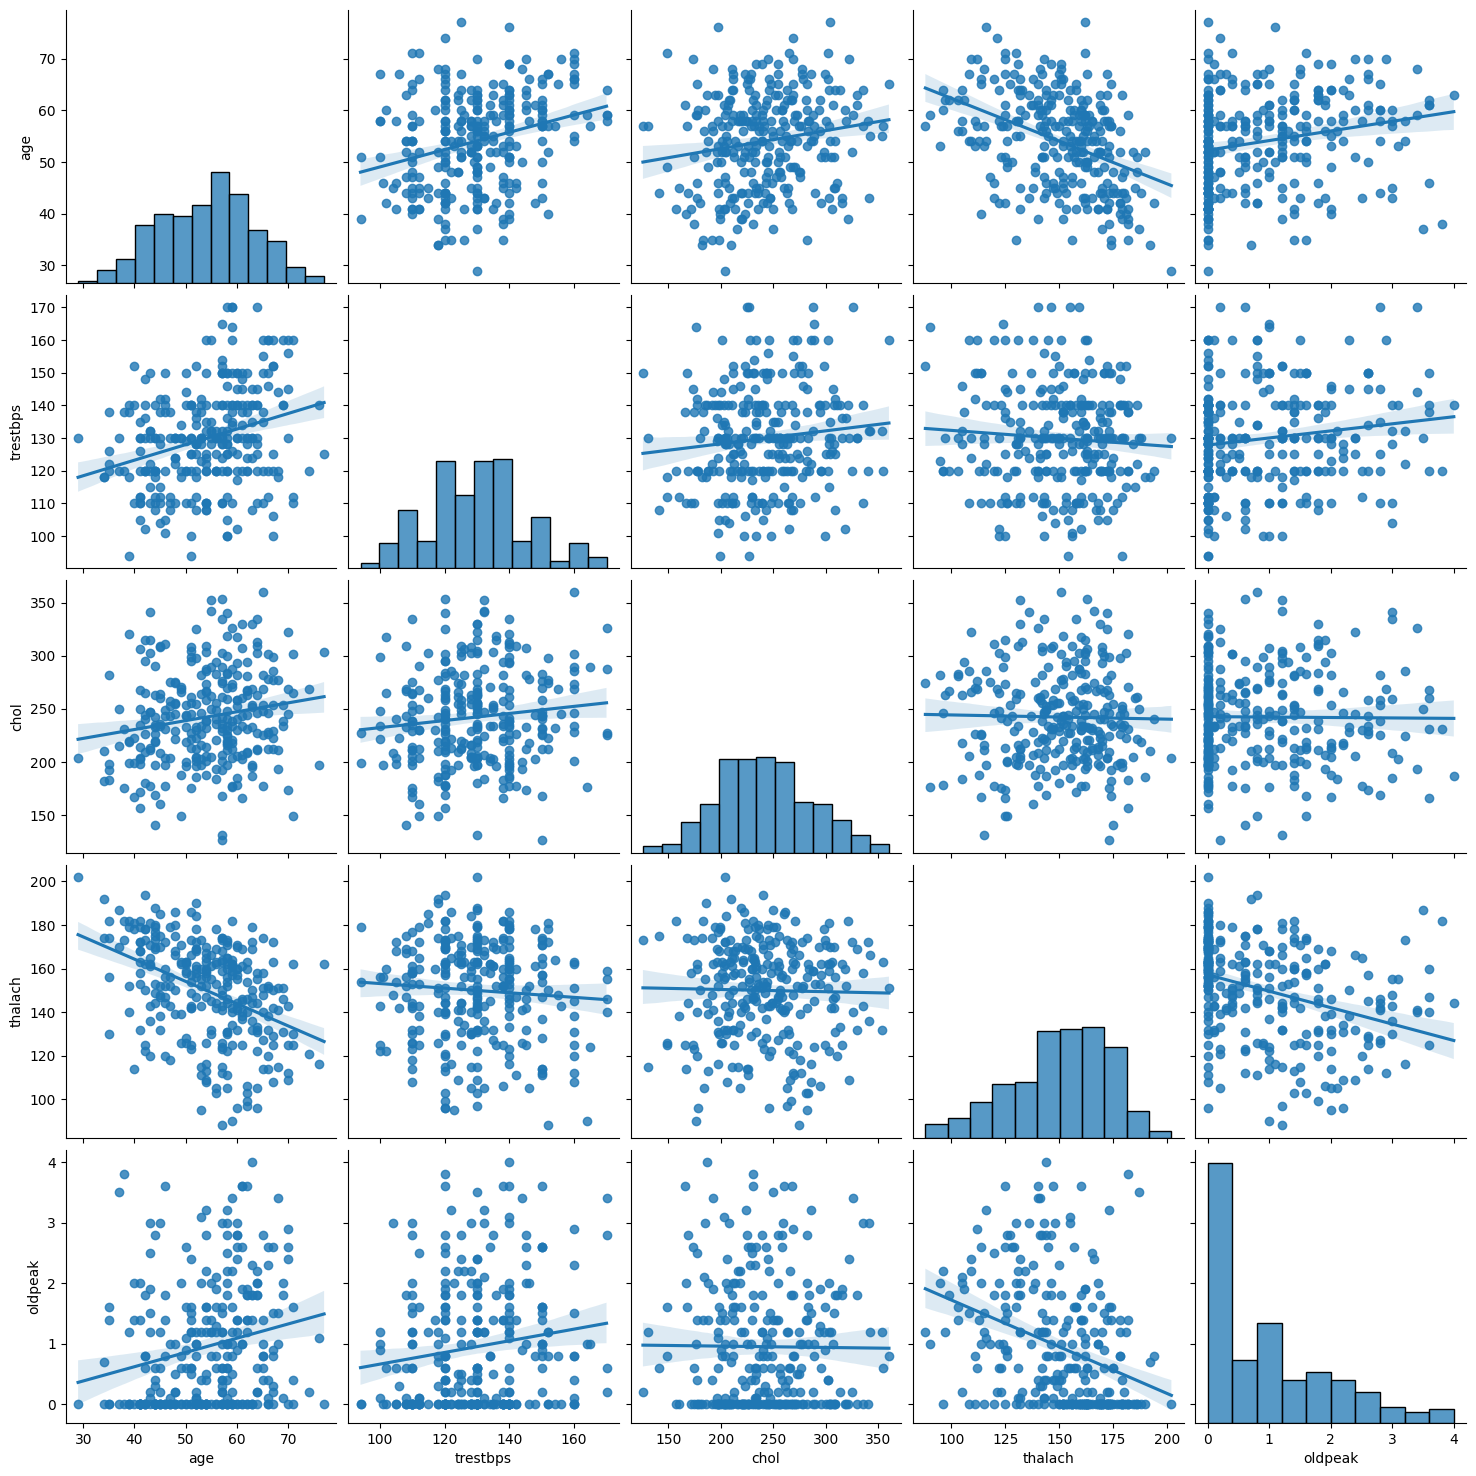

In [51]:
print('Pairplot')
sns.pairplot(data=data_nooutlier[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], height=3, diag_kind="hist", kind="reg")
plt.show()

#**Feature Engineering**

Encoding

In [52]:

for i in data_nooutlier.columns:
    print(i,data_nooutlier[i].unique())
    print('\n')

age [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]


sex [1 0]


cp [0 1 2 3]


trestbps [125. 140. 145. 148. 138. 100. 160. 120. 122. 112. 132. 118. 128. 124.
 106. 104. 135. 130. 136. 129. 150. 146. 117. 152. 154. 170. 134. 144.
 108. 123. 110. 142. 126.  94. 165. 115. 102. 105. 155. 164. 156. 101.]


chol [212. 203. 174. 294. 248. 289. 249. 286. 149. 341. 210. 204. 308. 266.
 244. 211. 185. 223. 208. 252. 209. 307. 233. 319. 256. 169. 131. 269.
 196. 231. 213. 271. 263. 229. 360. 258. 330. 342. 226. 278. 230. 283.
 241. 175. 188. 193. 245. 232. 299. 288. 197. 315. 215. 326. 207. 177.
 257. 255. 187. 201. 220. 268. 267. 236. 303. 282. 126. 309. 186. 275.
 281. 206. 335. 218. 254. 295. 260. 240. 302. 192. 225. 235. 274. 234.
 182. 167. 172. 298. 321. 300. 199. 157. 304. 222. 184. 354. 160. 247.
 239. 246. 293. 180. 250. 221. 318. 200. 227. 243. 311. 261. 242. 205.
 306. 219. 353. 198. 183. 224. 265. 228. 31

Encode Categorical Column

In [53]:
new_sex=pd.get_dummies(data=data_nooutlier['sex'],prefix='sex')
new_sex

,sex_0,sex_1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
723,1,0
733,1,0
739,0,1
843,0,1


In [54]:
new_cp=pd.get_dummies(data_nooutlier['cp'],prefix='chestPain')
new_cp

,chestPain_0,chestPain_1,chestPain_2,chestPain_3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
723,0,0,1,0
733,0,0,1,0
739,1,0,0,0
843,0,0,0,1


In [55]:
new_exang=pd.get_dummies(data_nooutlier['exang'],prefix='exang')
new_exang

,exang_0,exang_1
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
723,1,0
733,1,0
739,0,1
843,1,0


In [56]:
new_slope=pd.get_dummies(data_nooutlier['slope'],prefix='slope')
new_slope

,slope_0,slope_1,slope_2
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
723,0,1,0
733,0,1,0
739,0,0,1
843,0,0,1


In [57]:
new_thal=pd.get_dummies(data_nooutlier['thal'],prefix='thal')
new_thal

,thal_0,thal_1,thal_2,thal_3
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
723,0,0,1,0
733,0,0,1,0
739,0,0,0,1
843,0,0,1,0


In [58]:
new_ca=pd.get_dummies(data_nooutlier['ca'],prefix='ca')
new_ca

,ca_0,ca_1,ca_2,ca_3,ca_4
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
723,1,0,0,0,0
733,1,0,0,0,0
739,0,1,0,0,0
843,1,0,0,0,0


In [59]:
new_fbs=pd.get_dummies(data_nooutlier['fbs'],prefix='fbs')
new_fbs

,fbs_0,fbs_1
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
723,1,0
733,1,0
739,1,0
843,1,0


In [60]:
new_restecg=pd.get_dummies(data_nooutlier['restecg'],prefix='restecg')
new_restecg

,restecg_0,restecg_1,restecg_2
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
723,1,0,0
733,0,1,0
739,0,1,0
843,1,0,0


In [61]:
app=[data_nooutlier, new_sex, new_cp, new_ca, new_thal, new_exang, new_slope, new_fbs, new_restecg]
data2=pd.concat(app, axis = 1)
data2.drop(['sex','cp','thal','exang','ca','slope','fbs','restecg'], axis=1, inplace=True)

In [62]:
data2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,chestPain_0,chestPain_1,...,exang_0,exang_1,slope_0,slope_1,slope_2,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2
0,52,125.0,212.0,168.0,1.0,0,0,1,1,0,...,1,0,0,0,1,1,0,0,1,0
1,53,140.0,203.0,155.0,3.1,0,0,1,1,0,...,0,1,1,0,0,0,1,1,0,0
2,70,145.0,174.0,125.0,2.6,0,0,1,1,0,...,0,1,1,0,0,1,0,0,1,0
3,61,148.0,203.0,161.0,0.0,0,0,1,1,0,...,1,0,0,0,1,1,0,0,1,0
4,62,138.0,294.0,106.0,1.9,0,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0


Scaling

In [63]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [64]:
#standard scaler 
scaler = preprocessing.StandardScaler()
data2[['age','trestbps','chol','oldpeak','thalach']] = scaler.fit_transform(data2[['age','trestbps','chol','oldpeak','thalach']])

In [65]:
data2.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,chestPain_0,chestPain_1,...,exang_0,exang_1,slope_0,slope_1,slope_2,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2
0,-0.224919,-0.317917,-0.680075,0.796365,0.046903,0,0,1,1,0,...,1,0,0,0,1,1,0,0,1,0
1,-0.115174,0.658608,-0.881981,0.222452,2.096513,0,0,1,1,0,...,0,1,1,0,0,0,1,1,0,0
2,1.750489,0.984117,-1.532566,-1.101964,1.608511,0,0,1,1,0,...,0,1,1,0,0,1,0,0,1,0
3,0.762785,1.179422,-0.881981,0.487335,-0.929101,0,0,1,1,0,...,1,0,0,0,1,1,0,0,1,0
4,0.872530,0.528405,1.159512,-1.940760,0.925307,0,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
5,0.433550,-1.945459,0.127549,-1.234405,0.046903,1,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
7,0.104316,1.960642,1.047342,-0.219020,-0.148297,0,0,1,1,0,...,0,1,0,1,0,1,0,1,0,0
8,-0.883388,-0.643426,0.149983,-0.263167,-0.148297,0,0,1,1,0,...,1,0,0,0,1,1,0,1,0,0
9,-0.005429,-0.513222,0.980040,-1.499289,2.194113,0,0,1,1,0,...,0,1,0,1,0,1,0,1,0,0
10,1.860233,-1.164239,-2.093416,-1.101964,0.632506,1,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0


In [66]:

y = data2['target']
X = data2.drop(['target'], axis=1)

In [67]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 283, dtype: int64

In [68]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,chestPain_0,chestPain_1,chestPain_2,...,exang_0,exang_1,slope_0,slope_1,slope_2,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2
0,-0.224919,-0.317917,-0.680075,0.796365,0.046903,0,1,1,0,0,...,1,0,0,0,1,1,0,0,1,0
1,-0.115174,0.658608,-0.881981,0.222452,2.096513,0,1,1,0,0,...,0,1,1,0,0,0,1,1,0,0
2,1.750489,0.984117,-1.532566,-1.101964,1.608511,0,1,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,0.762785,1.179422,-0.881981,0.487335,-0.929101,0,1,1,0,0,...,1,0,0,0,1,1,0,0,1,0
4,0.872530,0.528405,1.159512,-1.940760,0.925307,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.530999,-0.643426,-0.702509,-1.543436,0.534906,1,0,0,0,1,...,1,0,0,1,0,1,0,1,0,0
733,-1.102878,-1.424646,-2.272888,1.105396,-0.343498,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
739,-0.224919,-0.122612,0.284587,0.487335,-0.929101,0,1,1,0,0,...,0,1,0,0,1,1,0,0,1,0
843,0.543295,1.960642,0.688398,-1.101964,-0.929101,0,1,0,0,0,...,1,0,0,0,1,1,0,1,0,0


Splitting Dataset

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, #perbandingan 20 untuk testing
                                                    random_state = 578)

In [71]:
#dimension
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 30)
(57, 30)
(226,)
(57,)


#**Modelling**

##**Base Model dan Hyperparameter Tuning**

### **Evaluation Metrics**

###**Random Forest**

**Base Model**

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

rfc = RandomForestClassifier(random_state=578)
rfc.fit(X_train, y_train)

rfc_test_prob = rfc.predict_proba(X_test)
rfc_train_prob = rfc.predict_proba(X_train)

rfc_test_pred = (rfc_test_prob[:, 1] > 0.5).astype('float')
rfc_train_pred = (rfc_train_prob[:, 1] > 0.5).astype('float')

In [73]:
from sklearn.metrics import recall_score

recall_rfc_train = recall_score(y_train, rfc_train_pred)
recall_rfc_test = recall_score(y_test, rfc_test_pred)
print("Recall untuk Random Forest Base Model (Train) : % f" %(recall_rfc_train))
print("Recall untuk Random Forest Base Model (Test) : % f" %(recall_rfc_test))

if recall_rfc_train > recall_rfc_test: 
  print("The model is overfitting the training data.")
else:
    print("The model is not overfitting the training data.")

Recall untuk Random Forest Base Model (Train) :  1.000000
Recall untuk Random Forest Base Model (Test) :  0.900000
The model is overfitting the training data.


**Hyperparameter Tuning**

In [74]:
n_estimators = [500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

In [75]:
rfch = RandomForestClassifier()
rfch_cv = RandomizedSearchCV(rfch, params_grid, 
                             scoring="accuracy", cv=5, n_iter=50, 
                             verbose=1, n_jobs=-1, random_state=578)
rfch_cv.fit(X_train, y_train)
best_params = rfch_cv.best_params_
print(f"Best parameters: {best_params}")

rfch2 = RandomForestClassifier(random_state = 578, **best_params)
rfch2.fit(X_train, y_train)
pred_test_rfch2 = rfch2.predict(X_test)
pred_train_rfch2 = rfch2.predict(X_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3}


In [76]:
recall_rfch_test = recall_score(y_test, pred_test_rfch2)
recall_rfch_train = recall_score(y_train, pred_train_rfch2)
print("Recall untuk Random Forest Hyperparameter Tuning (Train) : % f" %(recall_rfch_train))
print("Recall untuk Random Forest Hyperparameter Tuning (Test) : % f" %(recall_rfch_test))

Recall untuk Random Forest Hyperparameter Tuning (Train) :  0.937500
Recall untuk Random Forest Hyperparameter Tuning (Test) :  0.833333


###**Extreme Gradient Boosting**

**Base Model**

In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_train_prob = xgb.predict_proba(X_train)
xgb_test_prob = xgb.predict_proba(X_test)

xgb_train_pred = (xgb_train_prob[:, 1] > 0.5).astype('float')
xgb_test_pred = (xgb_test_prob[:, 1] > 0.5).astype('float')

In [78]:
recall_xgb_train = recall_score(y_train, xgb_train_pred)
recall_xgb_test = recall_score(y_test, xgb_test_pred)
print("Recall untuk XGBoost Base Model (Train) : % f" %(recall_xgb_train))
print("Recall untuk XGBoost Base Model (Test) : % f" %(recall_xgb_test))

if recall_xgb_train > recall_xgb_test: 
  print("The model is overfitting the training data.")
else:
    print("The model is not overfitting the training data.")

Recall untuk XGBoost Base Model (Train) :  1.000000
Recall untuk XGBoost Base Model (Test) :  0.900000
The model is overfitting the training data.


**Hyperparameter Tuning**

In [79]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

In [80]:
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgbh = XGBClassifier()
xgbh_cv = RandomizedSearchCV(
    xgbh, param_grid, cv=5, n_iter=150, #with 5 folds
    scoring='accuracy', n_jobs=-1, verbose=1, random_state=578
)
xgbh_cv.fit(X_train, y_train)
best_params = xgbh_cv.best_params_
print(f"Best paramters: {best_params}")

xgbh2 = XGBClassifier(random_state=578, **best_params)
xgbh2.fit(X_train, y_train)
xgbh2_test_pred = xgbh2.predict(X_test)
xgbh2_train_pred = xgbh2.predict(X_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best paramters: {'learning_rate': 0.0967548570868143, 'max_depth': 1, 'n_estimators': 369}


In [81]:
recall_xgbh_train = recall_score(y_train, xgbh2_train_pred)
recall_xgbh_test = recall_score(y_test, xgbh2_test_pred)
print("Recall untuk XGBoost Hyperparameter Tuning (Train): % f" %(recall_xgbh_train))
print("Recall untuk XGBoost Hyperparameter Tuning (Test): % f" %(recall_xgbh_test))

Recall untuk XGBoost Hyperparameter Tuning (Train):  0.937500
Recall untuk XGBoost Hyperparameter Tuning (Test):  0.833333


###**Logistic Regression**

**Base Model**

In [82]:
from sklearn.metrics import mean_squared_error

lr = LogisticRegression(solver = 'liblinear', random_state = 578)
lr.fit(X_train, y_train)

lr_train_prob = lr.predict_proba(X_train)
lr_test_prob = lr.predict_proba(X_test)

lr_train_pred = (lr_train_prob[:, 1] > 0.5).astype('float')
lr_test_pred = (lr_test_prob[:, 1] > 0.5).astype('float')

In [83]:
score = lr.score(X_test, y_test)
print(score)

0.8245614035087719


In [84]:
w0 =  lr.intercept_
w = [[w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, w25, w26, w27, w28, w29, w30]] = lr.coef_
w

array([[ 0.05548885, -0.16419371, -0.32634546,  0.41490331, -0.50871031,
         0.72788651, -0.72266044, -0.87060264, -0.16712533,  0.68733133,
         0.35562271,  1.31132875, -0.14102155, -0.96172314, -0.23287489,
         0.0295169 , -0.30961786,  0.50920585,  0.69213239, -0.88649431,
         0.32724427, -0.3220182 , -0.08612806, -0.42291137,  0.5142655 ,
        -0.08357959,  0.08880566, -0.26790361,  0.28962279, -0.01649311]])

In [85]:
recall_lr_train = recall_score(y_train, lr_train_pred)
recall_lr_test = recall_score(y_test, lr_test_pred)
print("Recall untuk Logistic Regression Base Model (Train) : % f" %(recall_lr_train))
print("Recall untuk Logistic Regression Base Model (Test) : % f" %(recall_lr_test))

if recall_lr_train > recall_lr_test: 
  print("The model is overfitting the training data.")
else:
    print("The model is not overfitting the training data.")

Recall untuk Logistic Regression Base Model (Train) :  0.906250
Recall untuk Logistic Regression Base Model (Test) :  0.866667
The model is overfitting the training data.


**Hyperparameter Tuning**

In [86]:
from sklearn.preprocessing import PowerTransformer
params_lr = {'C': [0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'fit_intercept': [True, False],
    'solver': ['liblinear'],
    'max_iter': [1000],}

lrh_cv = RandomizedSearchCV(lr, params_lr, cv=5, #with 5 folds
                             scoring='accuracy', n_jobs=-1, verbose=1, random_state = 578)

Data_transformed = PowerTransformer().fit_transform(X_test)

lrh_cv.fit(Data_transformed, y_test)
best_params = lrh_cv.best_params_
print(f"Best paramters: {best_params}")

lrh2 = LogisticRegression(random_state=578, **best_params)
lrh2.fit(X_train, y_train)
lrh2_test_pred = lrh2.predict(X_test)
lrh2_train_pred = lrh2.predict(X_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best paramters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'fit_intercept': True, 'C': 0.1}


In [87]:
recall_lrh_train = recall_score(y_train, lrh2_train_pred)
recall_lrh_test = recall_score(y_test, lrh2_test_pred)
print("Recall untuk Logistic Regression Hyperparameter Tuning (Train): % f" %(recall_lrh_train))
print("Recall untuk Logistic Regression Hyperparameter Tuning (Test): % f" %(recall_lrh_test))

Recall untuk Logistic Regression Hyperparameter Tuning (Train):  0.906250
Recall untuk Logistic Regression Hyperparameter Tuning (Test):  0.866667


##**Cross Validation**

###**Random Forest**

In [88]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import cross_val_score

scoring = make_scorer(recall_score)
recall_scores_rfc = cross_val_score(rfch2, X, y, cv=5, scoring=scoring)

print("Mean Recall score for Random Forest: %f with standard deviation %f" %(recall_scores_rfc.mean(), recall_scores_rfc.std()))

Mean Recall score for Random Forest: 0.898185 with standard deviation 0.047625


###**Extreme Gradient Boosting**

In [89]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import cross_val_score

scoring = make_scorer(recall_score)
recall_scores_xgb = cross_val_score(xgbh2, X, y, cv=5, scoring=scoring)

print("Mean Recall score for XGBoost: % f with standard deviation %f" %(recall_scores_xgb.mean(), recall_scores_xgb.std()))

Mean Recall score for XGBoost:  0.873387 with standard deviation 0.019863


###**Logistic Regression**

In [90]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import cross_val_score

scoring = make_scorer(recall_score)
recall_scores_lr = cross_val_score(lrh2, X, y, cv=5, scoring=scoring)

print("Mean Recall score for Logistic Regression : % f with standard deviation %f" %(recall_scores_lr.mean(), recall_scores_lr.std()))

Mean Recall score for Logistic Regression :  0.904637 with standard deviation 0.053283


##**Bootstrapping**

###**Random Forest**

In [91]:
# Set random seed
np.random.seed(578)

# Use bootstrapping to estimate the accuracy of the model
n_bootstraps = 20
recalls1 = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    indices = np.random.choice(range(len(data2)), size=len(data2), replace=True)
    X_boot = X.iloc[indices]
    y_boot = y.iloc[indices]
    # Train the model on the bootstrap sample
    rfch2.fit(X_boot, y_boot)
    # Evaluate the model on the entire dataset
    yhat = rfch2.predict(X)
    recall = recall_score(y, yhat)
    recalls1.append(recall)

# Calculate the mean and confidence interval of the accuracies
mean_recall1 = np.mean(recalls1)
std_recall1 = np.std(recalls1)
lower_ci1 = mean_recall1 - 1.96 * std_recall1
upper_ci1 = mean_recall1 + 1.96 * std_recall1

# Print the results
print("Mean Recall: %.2f" % mean_recall1)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci1, upper_ci1))


Mean Recall: 0.92
95% confidence interval: [0.85, 0.98]


###**Extreme Gradient Boosting**

In [92]:
# Set random seed
np.random.seed(578)

# Use bootstrapping to estimate the accuracy of the model
n_bootstraps = 20
recalls2 = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    indices = np.random.choice(range(len(data2)), size=len(data2), replace=True)
    X_boot = X.iloc[indices]
    y_boot = y.iloc[indices]
    # Train the model on the bootstrap sample
    xgbh2.fit(X_boot, y_boot)
    # Evaluate the model on the entire dataset
    yhat = xgbh2.predict(X)
    recall = recall_score(y, yhat)
    recalls2.append(recall)

# Calculate the mean and confidence interval of the accuracies
mean_recall2 = np.mean(recalls2)
std_recall2 = np.std(recalls2)
lower_ci2 = mean_recall2 - 1.96 * std_recall2
upper_ci2 = mean_recall2 + 1.96 * std_recall2

# Print the results
print("Mean Recall: %.2f" % mean_recall2)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci2, upper_ci2))


Mean Recall: 0.91
95% confidence interval: [0.87, 0.95]


###**Logistic Regression**

In [93]:
# Set random seed
np.random.seed(578)

# Use bootstrapping to estimate the accuracy of the model
n_bootstraps = 20
recalls3 = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    indices = np.random.choice(range(len(data2)), size=len(data2), replace=True)
    X_boot = X.iloc[indices]
    y_boot = y.iloc[indices]
    # Train the model on the bootstrap sample
    lrh2.fit(X_boot, y_boot)
    # Evaluate the model on the entire dataset
    yhat = lrh2.predict(X)
    recall = recall_score(y, yhat)
    recalls3.append(recall)

# Calculate the mean and confidence interval of the accuracies
mean_recall3 = np.mean(recalls3)
std_recall3 = np.std(recalls3)
lower_ci3 = mean_recall3 - 1.96 * std_recall3
upper_ci3 = mean_recall3 + 1.96 * std_recall3

# Print the results
print("Mean Recall: %.2f" % mean_recall3)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci3, upper_ci3))


Mean Recall: 0.90
95% confidence interval: [0.85, 0.95]


#**Model Comparison**

##**Based on Recall**

**Base Model**

In [94]:
models = pd.DataFrame({
    'Base Model': ['Random Forest', 'XGBoost', 'Logistic Regression'],
    'Recall Train'    : [recall_rfc_train, recall_xgb_train, recall_lr_train],
    'Recall Test'    : [recall_rfc_test, recall_xgb_test, recall_lr_test]
    }, columns = ['Base Model', 'Recall Train', 'Recall Test'])

models.sort_values(by='Recall Test', ascending=False)

,Base Model,Recall Train,Recall Test
0,Random Forest,1.00000,0.900000
1,XGBoost,1.00000,0.900000
2,Logistic Regression,0.90625,0.866667


**Hyperparameter Tuning**

In [95]:
models = pd.DataFrame({
    'Hyperparameter Tuning Model': ['Random Forest', 'XGBoost', 'Logistic Regression'],
    'Recall Train'    : [recall_rfch_train, recall_xgbh_train, recall_lrh_train],
    'Recall Test'    : [recall_rfch_test, recall_xgbh_test, recall_lrh_test]
    }, columns = ['Hyperparameter Tuning Model', 'Recall Train', 'Recall Test'])

models.sort_values(by='Recall Test', ascending=False)

,Hyperparameter Tuning Model,Recall Train,Recall Test
2,Logistic Regression,0.90625,0.866667
0,Random Forest,0.93750,0.833333
1,XGBoost,0.93750,0.833333


**Cross Validation**

In [96]:
models = pd.DataFrame({
    'Model CV'         : ['Random Forest', 'XGBoost', 'Logistic Regression'],
    'Mean Recall'    : [recall_scores_rfc.mean(), recall_scores_xgb.mean(), recall_scores_lr.mean()]
    }, columns = ['Model CV','Mean Recall'])

models.sort_values(by='Mean Recall', ascending=False)

,Model CV,Mean Recall
2,Logistic Regression,0.904637
0,Random Forest,0.898185
1,XGBoost,0.873387


**Bootstrapping**

In [97]:
models = pd.DataFrame({
    'Model Bootstrap'  : ['Random Forest', 'XGBoost', 'Logistic Regression'],
    'Mean Recall'    : [mean_recall1, mean_recall2, mean_recall3]
    }, columns = ['Model Bootstrap','Mean Recall'])

models.sort_values(by='Mean Recall', ascending=False)

,Model Bootstrap,Mean Recall
0,Random Forest,0.916139
1,XGBoost,0.909177
2,Logistic Regression,0.903165


##**Classification Report**

In [98]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

**Random Forest**

In [99]:
print(classification_report(y_test, pred_test_rfch2))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.81      0.83      0.82        30

    accuracy                           0.81        57
   macro avg       0.81      0.81      0.81        57
weighted avg       0.81      0.81      0.81        57



**XGBoost**

In [100]:
print(classification_report(y_test, xgbh2_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.76      0.83      0.79        30

    accuracy                           0.77        57
   macro avg       0.77      0.77      0.77        57
weighted avg       0.77      0.77      0.77        57



**Logistic Regression**

In [101]:
print(classification_report(y_test, lrh2_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.81      0.87      0.84        30

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57



##**Confusion Matrix**

In [102]:
from sklearn.metrics import confusion_matrix

cm_rfch = confusion_matrix(y_test,pred_test_rfch2)
cm_xgbh = confusion_matrix(y_test,xgbh2_test_pred)
cm_lrh = confusion_matrix(y_test,lrh2_test_pred)

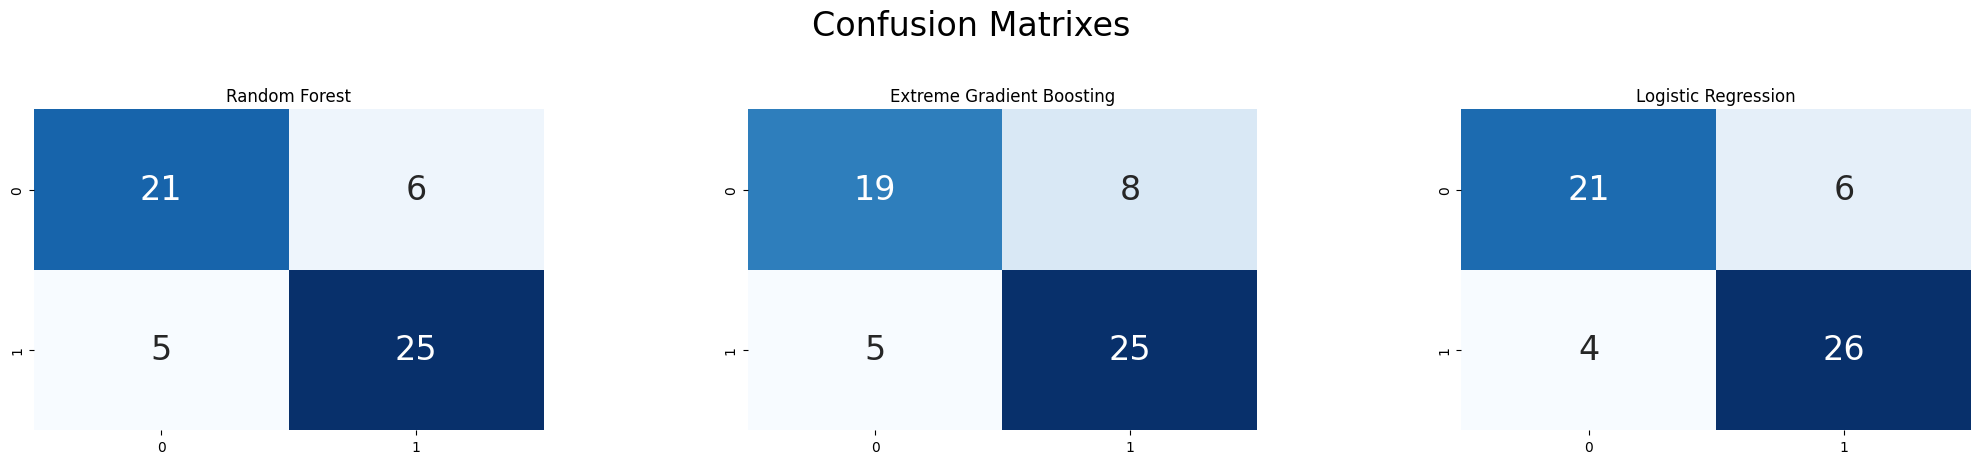

In [103]:
plt.figure(figsize=(25,10))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Random Forest")
sns.heatmap(cm_rfch,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Extreme Gradient Boosting")
sns.heatmap(cm_xgbh,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Logistic Regression")
sns.heatmap(cm_lrh,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

##**ROC Curve**

In [104]:
auc_rf = roc_auc_score(y_test, rfc_test_prob[:, 1])
auc_xgb = roc_auc_score(y_test, xgb_test_prob[:, 1])
auc_lr = roc_auc_score(y_test, lr_test_prob[:, 1])

print(f"AUC-ROC for Random Forest Model: {auc_rf}")
print(f"AUC-ROC for XGBoost Model: {auc_xgb}")
print(f"AUC-ROC for Logistic Regression Model: {auc_lr}")

AUC-ROC for Random Forest Model: 0.9265432098765432
AUC-ROC for XGBoost Model: 0.9037037037037037
AUC-ROC for Logistic Regression Model: 0.9074074074074073


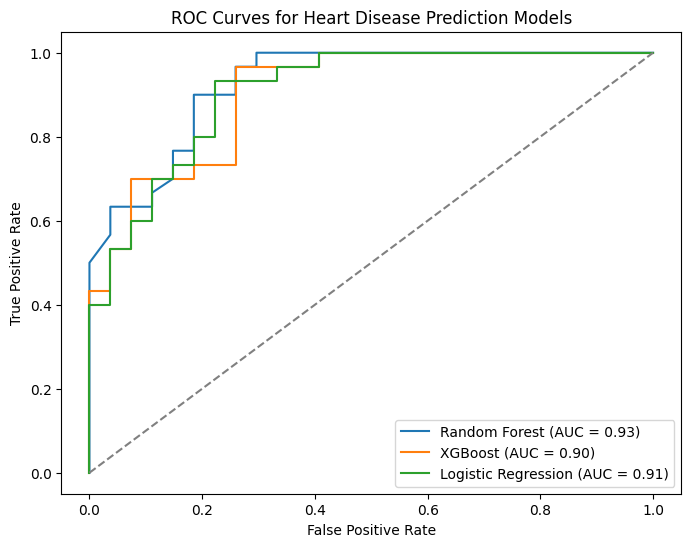

In [105]:
def plot_roc_curves(y_test, rfc_test_prob, xgb_test_prob, lr_test_prob):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_rf, tpr_rf, _ = roc_curve(y_test, rfc_test_prob[:, 1])
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_test_prob[:, 1])
    fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_test_prob[:, 1])

    # Plot ROC curves
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
    plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

    # Plot random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, rfc_test_prob, xgb_test_prob, lr_test_prob)

##**Learning Curve**

**Random Forest**

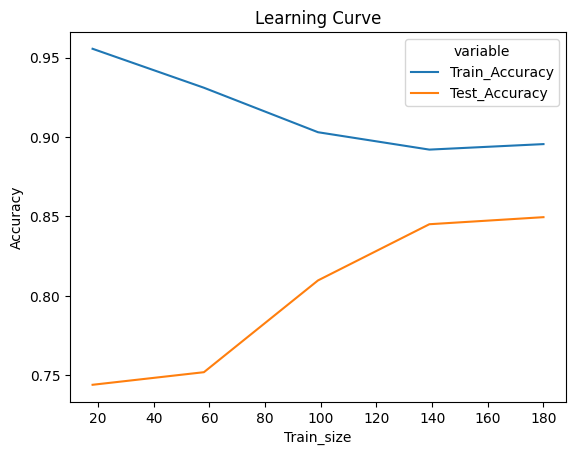

In [106]:
from sklearn.model_selection import learning_curve

train_size,train_acc,test_acc = learning_curve(rfch2, X_train, y_train, cv=5)
learn_df = pd.DataFrame({"Train_size":train_size,"Train_Accuracy":train_acc.mean(axis=1),"Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars="Train_size")
sns.lineplot(x="Train_size",y="value",data=learn_df,hue="variable")
plt.title("Learning Curve")
plt.ylabel("Accuracy");


**XGBoost**

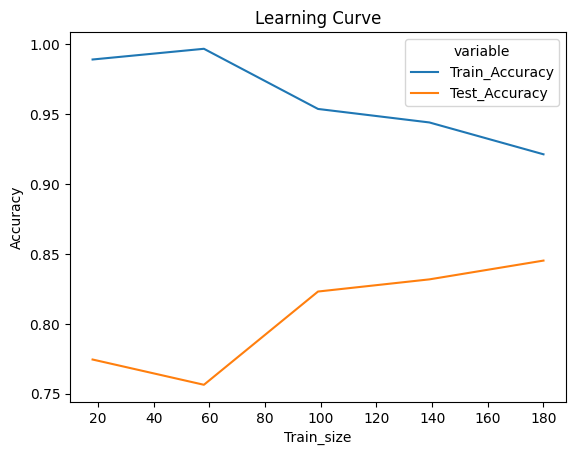

In [107]:
from sklearn.model_selection import learning_curve

train_size,train_acc,test_acc = learning_curve(xgbh2, X_train, y_train, cv=5)
learn_df = pd.DataFrame({"Train_size":train_size,"Train_Accuracy":train_acc.mean(axis=1),"Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars="Train_size")
sns.lineplot(x="Train_size",y="value",data=learn_df,hue="variable")
plt.title("Learning Curve")
plt.ylabel("Accuracy");


**Logistic Regression**

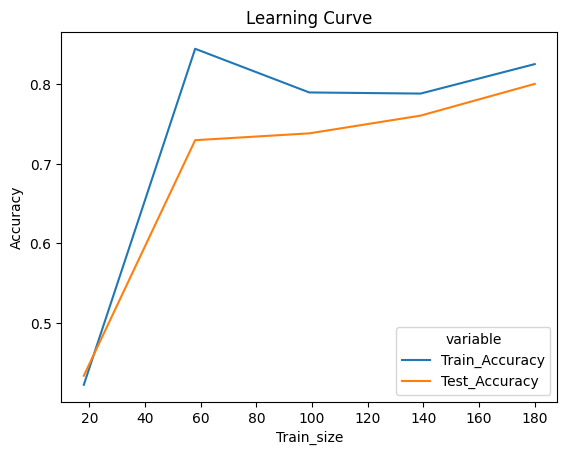

In [108]:
from sklearn.model_selection import learning_curve

train_size,train_acc,test_acc = learning_curve(lrh2, X_train, y_train, cv=5)
learn_df = pd.DataFrame({"Train_size":train_size,"Train_Accuracy":train_acc.mean(axis=1),"Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars="Train_size")
sns.lineplot(x="Train_size",y="value",data=learn_df,hue="variable")
plt.title("Learning Curve")
plt.ylabel("Accuracy");


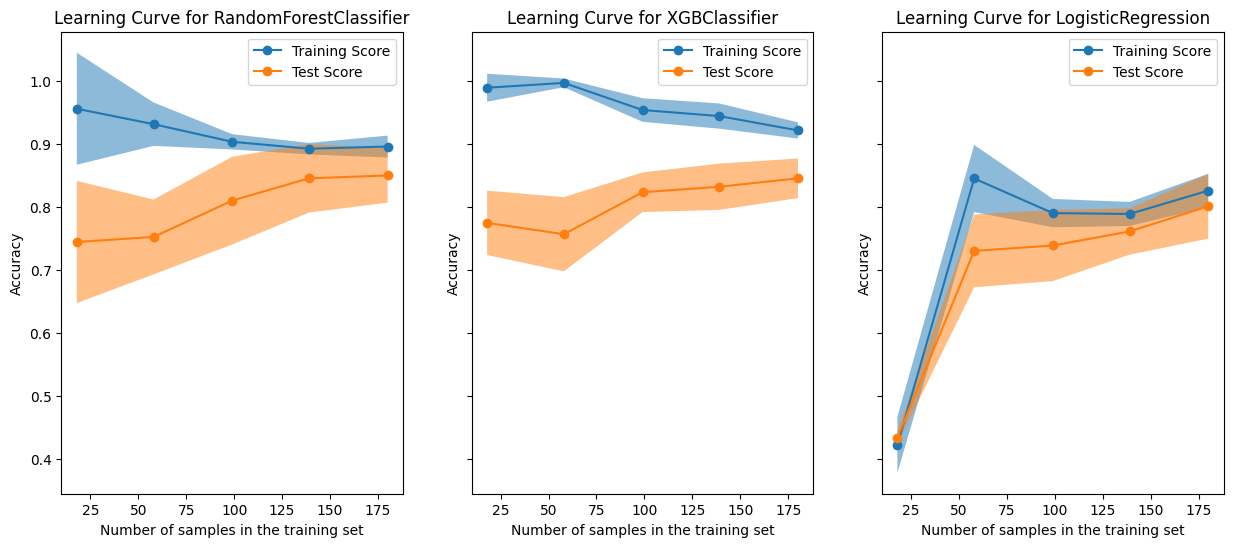

In [109]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([rfch2, xgbh2, lrh2]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

#Feature Importance

In [110]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [111]:
import math

def get_feature_importance(lrh2, feature_names):
    w = lr.coef_[0]
    feature_importance = pd.DataFrame(feature_names, columns=["feature"])
    feature_importance["importance"] = pow(math.e, w)
    feature_importance = feature_importance.sort_values(by=["importance"], ascending=False)
    return feature_importance

feature_importance_lr = get_feature_importance(lrh2, X_train.columns)
feature_importance_lr

,feature,importance
11,ca_0,3.711102
5,sex_0,2.070700
18,thal_2,1.997971
9,chestPain_2,1.988402
24,slope_2,1.672410
17,thal_1,1.663969
3,thalach,1.514224
10,chestPain_3,1.427069
20,exang_0,1.387140
28,restecg_1,1.335923
